In [2]:
import pandas as pd
import numpy as np
import matplotlib as plot
from matplotlib import pyplot

In [12]:
df= pd.read_csv(filepath_or_buffer = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv")

In [14]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837


In [20]:
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB


In [28]:
df['Screen_Size_cm']= np.round(df['Screen_Size_cm'],2)

In [30]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [36]:
missing_data =df.isnull()

In [38]:
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
df.describe(include="all")

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238,238.000000,238,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
unique,NaN,11,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Dell,NaN,Full HD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,71,NaN,161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,118.500000,NaN,3.205882,NaN,2.151261,1.058824,5.630252,37.267863,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,NaN,0.776533,NaN,0.638282,0.235790,1.241787,2.970222,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,NaN,1.000000,NaN,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,NaN,3.000000,NaN,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,NaN,4.000000,NaN,3.000000,1.000000,7.000000,39.620000,2.700000,8.000000,256.000000,2.200000,1777.000000


In [54]:
bins = np.linspace(min(df['Price']),max(df['Price']),4)
group_names = ['Low','Medium','High']
df['Price_Binned'] = pd.cut(df['Price'],bins,labels=group_names,include_lowest= True)

In [56]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_Binned
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,Low
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,Low
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,Low
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,Low
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,Low


In [66]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price_Binned')

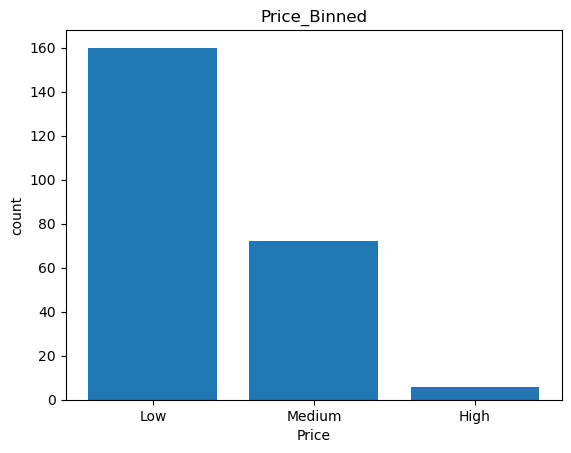

In [76]:
plt.bar(group_names,df["Price_Binned"].value_counts())
plt.xlabel('Price')
plt.ylabel('count')
plt.title('Price_Binned')

In [78]:
dummy_variable1 = pd.get_dummies(df['Screen'])

In [82]:
dummy_variable1.rename(columns={'IPS Panel':'Screen-IPS Panel','Full HD':'Screen-Full HD'})

,Screen-Full HD,Screen-IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False
...,...,...
233,False,True
234,True,False
235,False,True
236,True,False


In [88]:
df=pd.concat([df,dummy_variable1],axis=1)

In [90]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_Binned,Full HD,IPS Panel
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978,Low,False,True
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634,Low,True,False
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946,Low,True,False
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244,Low,False,True
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837,Low,True,False


In [92]:
df.drop(["Screen"],axis=1,inplace=True)

In [94]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price,Price_Binned,Full HD,IPS Panel
0,0,Acer,4,2,1,5,35.56,1.6,8,256,1.60,978,Low,False,True
1,1,Dell,3,1,1,3,39.62,2.0,4,256,2.20,634,Low,True,False
2,2,Dell,3,1,1,7,39.62,2.7,8,256,2.20,946,Low,True,False
3,3,Dell,4,2,1,5,33.78,1.6,8,128,1.22,1244,Low,False,True
4,4,HP,4,2,1,7,39.62,1.8,8,256,1.91,837,Low,True,False


In [96]:
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,234.000000,238.000000,238.000000,238.000000,233.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,37.267863,2.360084,7.882353,245.781513,1.862232,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,2.970222,0.411393,2.482603,34.765316,0.494332,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,30.480000,1.200000,4.000000,128.000000,0.810000,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,35.560000,2.000000,8.000000,256.000000,1.440000,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,38.100000,2.500000,8.000000,256.000000,1.870000,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,39.620000,2.700000,8.000000,256.000000,2.200000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,43.940000,2.900000,16.000000,256.000000,3.600000,3810.000000


In [ ]:
df.drop(['Unnamed: 0'],